## Credit card fraud
### Code to model credit card fraud data (kaggle data set)
#### Data set is supposed to be highly skewed. 
#### Code attempt from scratch by Asit R but based on learning from internet attempts. 8/6/23
#### https://www.kaggle.com/mlg-ulb/creditcardfraud

In [237]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [238]:
## Read creditcard.csv from its location . Original file downloaded from kaggle.com
cfdf = pd.read_csv("./datasets/creditcard.csv")

In [239]:
## inspect data frame with head, shape, describe and info

cfdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [240]:
cfdf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [241]:
cfdf.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [242]:
cfdf.shape

(284807, 31)

In [243]:
cfdf.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,...,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [244]:
## Inspect if data is skewed
cfdf.Class.value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'class Distributions, 0=No Fraud || 1=Fraud')

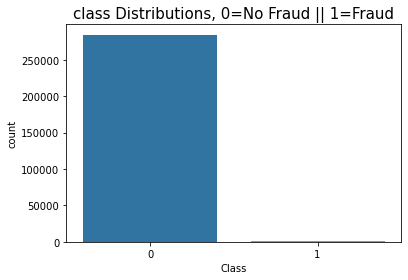

In [245]:
ctplt = sns.countplot(cfdf.Class)
plt.title('class Distributions, 0=No Fraud || 1=Fraud',fontsize = 15)

In [246]:
majority = cfdf[cfdf.Class == 0]
minority = cfdf[cfdf.Class == 1]

In [247]:
majority.shape

(284315, 31)

In [248]:
minority.shape

(492, 31)

In [249]:
majority = majority.sample(minority.shape[0],replace = False,random_state=0)

In [250]:
newdf = pd.concat([majority,minority])

In [251]:
newdf.shape

(984, 31)

In [252]:
sum(newdf.isnull().any(axis=0))

0

In [253]:
sum(newdf.isna().any(axis=0))

0

In [254]:
## Split data into X and y, where y is the last class column

y = newdf.iloc[:,-1:]

In [255]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 266085 to 281674
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   984 non-null    int64
dtypes: int64(1)
memory usage: 15.4 KB


In [256]:
y.tail()

,Class
279863,1
280143,1
280149,1
281144,1
281674,1


In [257]:
X = newdf.iloc[:,:-1]

In [258]:
### Split data into training and test data with 20% in test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [259]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787 entries, 215984 to 79536
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    787 non-null    float64
 1   V1      787 non-null    float64
 2   V2      787 non-null    float64
 3   V3      787 non-null    float64
 4   V4      787 non-null    float64
 5   V5      787 non-null    float64
 6   V6      787 non-null    float64
 7   V7      787 non-null    float64
 8   V8      787 non-null    float64
 9   V9      787 non-null    float64
 10  V10     787 non-null    float64
 11  V11     787 non-null    float64
 12  V12     787 non-null    float64
 13  V13     787 non-null    float64
 14  V14     787 non-null    float64
 15  V15     787 non-null    float64
 16  V16     787 non-null    float64
 17  V17     787 non-null    float64
 18  V18     787 non-null    float64
 19  V19     787 non-null    float64
 20  V20     787 non-null    float64
 21  V21     787 non-null    float64


In [260]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 28013 to 203700
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    197 non-null    float64
 1   V1      197 non-null    float64
 2   V2      197 non-null    float64
 3   V3      197 non-null    float64
 4   V4      197 non-null    float64
 5   V5      197 non-null    float64
 6   V6      197 non-null    float64
 7   V7      197 non-null    float64
 8   V8      197 non-null    float64
 9   V9      197 non-null    float64
 10  V10     197 non-null    float64
 11  V11     197 non-null    float64
 12  V12     197 non-null    float64
 13  V13     197 non-null    float64
 14  V14     197 non-null    float64
 15  V15     197 non-null    float64
 16  V16     197 non-null    float64
 17  V17     197 non-null    float64
 18  V18     197 non-null    float64
 19  V19     197 non-null    float64
 20  V20     197 non-null    float64
 21  V21     197 non-null    float64


In [261]:
##scaling the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [262]:
## Logistic regression with all features
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [263]:
y_pred = lr_classifier.predict(X_test)

In [264]:
## Test the prediction scores of the logistic regression model using standard metrics

In [265]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,\
    precision_score,recall_score

In [266]:
acc = accuracy_score(y_test,y_pred)
acc

0.9238578680203046

In [267]:
f1 = f1_score(y_test,y_pred)
f1

0.9261083743842364

In [268]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[88,  3],
       [12, 94]])

In [269]:
prec_score = precision_score(y_test,y_pred)
prec_score

0.9690721649484536

In [270]:
rec_score = recall_score(y_test,y_pred)
rec_score

0.8867924528301887

In [271]:
# Getting the results

compare_results = pd.DataFrame([['Logistic', acc, f1, prec_score, rec_score]],
                       columns = ["Model_name", "Accuracy", "f1", "Precision", "Recall"])

compare_results

,Model_name,Accuracy,f1,Precision,Recall
0,Logistic,0.923858,0.926108,0.969072,0.886792


In [272]:
## Fit with a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train,np.ravel(y_train))

RandomForestClassifier(random_state=0)

In [273]:
y_pred = rf_classifier.predict(X_test)

In [274]:
acc = accuracy_score(y_test,y_pred)
acc

0.9137055837563451

In [275]:
f1 = f1_score(y_test,y_pred)
f1

0.9154228855721392

In [276]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[88,  3],
       [14, 92]])

In [277]:
prec_score = precision_score(y_test,y_pred)
prec_score

0.968421052631579

In [278]:
rec_score = recall_score(y_test,y_pred)
rec_score

0.8679245283018868

In [279]:
model_results = pd.DataFrame([['Random Forest', acc, f1, prec_score, rec_score]],
                       columns = ["Model_name", "Accuracy", "f1", "Precision", "Recall"])

compare_results = pd.concat([compare_results, model_results], ignore_index=True)

compare_results

,Model_name,Accuracy,f1,Precision,Recall
0,Logistic,0.923858,0.926108,0.969072,0.886792
1,Random Forest,0.913706,0.915423,0.968421,0.867925


In [280]:
## Fit with a Random Forest Classifier
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=0)
xgb_classifier.fit(X_train,y_train)

[19:18:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=10, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [281]:
y_pred = xgb_classifier.predict(X_test)

In [282]:
acc = accuracy_score(y_test,y_pred)
acc

0.9543147208121827

In [283]:
f1 = f1_score(y_test,y_pred)
f1

0.9560975609756097

In [284]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[90,  1],
       [ 8, 98]])

In [285]:
prec_score = precision_score(y_test,y_pred)
prec_score

0.98989898989899

In [286]:
rec_score = recall_score(y_test,y_pred)
rec_score

0.9245283018867925

In [287]:
model_results = pd.DataFrame([['XGBoost', acc, f1, prec_score, rec_score]],
                       columns = ["Model_name", "Accuracy", "f1", "Precision", "Recall"])

compare_results = pd.concat([compare_results, model_results], ignore_index=True)

compare_results

,Model_name,Accuracy,f1,Precision,Recall
0,Logistic,0.923858,0.926108,0.969072,0.886792
1,Random Forest,0.913706,0.915423,0.968421,0.867925
2,XGBoost,0.954315,0.956098,0.989899,0.924528


In [288]:
## Fit with a SVM Classifier
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', gamma='auto', random_state=0, class_weight='balanced')
svm_classifier.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(class_weight='balanced', gamma='auto', random_state=0)

In [289]:
y_pred = svm_classifier.predict(X_test)

In [290]:
acc = accuracy_score(y_test,y_pred)
acc

0.9137055837563451

In [291]:
f1 = f1_score(y_test,y_pred)
f1

0.914572864321608

In [292]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[89,  2],
       [15, 91]])

In [293]:
prec_score = precision_score(y_test,y_pred)
prec_score

0.978494623655914

In [294]:
rec_score = recall_score(y_test,y_pred)
rec_score

0.8584905660377359

In [295]:
model_results = pd.DataFrame([['SVM_classifier', acc, f1, prec_score, rec_score]],
                       columns = ["Model_name", "Accuracy", "f1", "Precision", "Recall"])

compare_results = pd.concat([compare_results, model_results], ignore_index=True)

compare_results

,Model_name,Accuracy,f1,Precision,Recall
0,Logistic,0.923858,0.926108,0.969072,0.886792
1,Random Forest,0.913706,0.915423,0.968421,0.867925
2,XGBoost,0.954315,0.956098,0.989899,0.924528
3,SVM_classifier,0.913706,0.914573,0.978495,0.858491
